In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [186]:
df = pd.read_csv('Bank_Churn.csv')
pd.set_option('display.max_columns', None)

In [187]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [226]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [188]:
df.shape

(10000, 14)

In [189]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [190]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [191]:
drop_col = ['RowNumber', 'CustomerId', 'Surname']

df = df.drop(drop_col, axis = 1)

In [192]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [193]:
df_1 = pd.get_dummies(data = df, columns = ['Geography'], dtype = (int))

In [194]:
df_1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [195]:
df_1['Gender'].replace({'Female' : 0, 'Male' : 1}, inplace = True)

In [196]:
df_1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [197]:
#Scale = MinMaxScaler()

In [198]:
#Scale_col = ['CreditScore', 'Age','Tenure', 'NumOfProducts']

#df_1[Scale_col] = Scale.fit_transform(df_1[Scale_col])

In [199]:
df_1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [200]:
X = df_1.drop('Exited', axis = 1)
Y = df_1.Exited

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [202]:
X_train.shape

(7000, 12)

In [203]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(5, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [204]:
model.fit(X_train, Y_train, epochs = 150)

Epoch 1/150
219/219 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.7923
Epoch 2/150
219/219 [==============================] - 0s 999us/step - loss: 0.6174 - accuracy: 0.7936
Epoch 3/150
219/219 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.7936
Epoch 4/150
219/219 [==============================] - 0s 960us/step - loss: 0.5582 - accuracy: 0.7936
Epoch 5/150
219/219 [==============================] - 0s 990us/step - loss: 0.5410 - accuracy: 0.7936
Epoch 6/150
219/219 [==============================] - 0s 981us/step - loss: 0.5293 - accuracy: 0.7936
Epoch 7/150
219/219 [==============================] - 0s 975us/step - loss: 0.5216 - accuracy: 0.7936
Epoch 8/150
219/219 [==============================] - 0s 955us/step - loss: 0.5166 - accuracy: 0.7936
Epoch 9/150
219/219 [==============================] - 0s 948us/step - loss: 0.5135 - accuracy: 0.7936
Epoch 10/150
219/219 [==============================] - 0s 981us/step - loss:

219/219 [==============================] - 0s 987us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 81/150
219/219 [==============================] - 0s 998us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 82/150
219/219 [==============================] - 0s 957us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 83/150
219/219 [==============================] - 0s 939us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 84/150
219/219 [==============================] - 0s 982us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 85/150
219/219 [==============================] - 0s 939us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 86/150
219/219 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7936
Epoch 87/150
219/219 [==============================] - 0s 986us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 88/150
219/219 [==============================] - 0s 943us/step - loss: 0.5092 - accuracy: 0.7936
Epoch 89/150
219/219 [==============================] - 0s 1ms/step - loss: 0.5

In [205]:
model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 925us/step - loss: 0.4969 - accuracy: 0.8027


[0.4969339072704315, 0.8026666641235352]

In [206]:
y_pred = model.predict(X_test)

In [207]:
y_prediction = []

for element in y_pred:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [208]:
print(classification_report(Y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2408
           1       0.00      0.00      0.00       592

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.64      0.80      0.71      3000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = y_pred)

In [210]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2408,    0],
       [ 592,    0]])>

<AxesSubplot:>

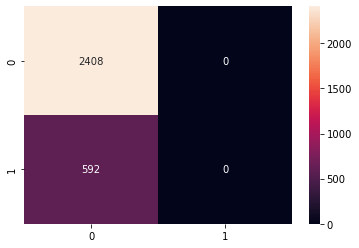

In [211]:
sns.heatmap(cm, annot = True, fmt = 'd')